In [1]:
import pandas as pd
df = pd.read_csv('../data/processed/recent_data_with_sentiment.csv')

/var/folders/y9/m6kzn12n3yn2h7b76mwm3zv40000gn/T/ipykernel_77798/1530573428.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['date', 'sentiment_bin'])['returns'].mean().unstack(fill_value=0)


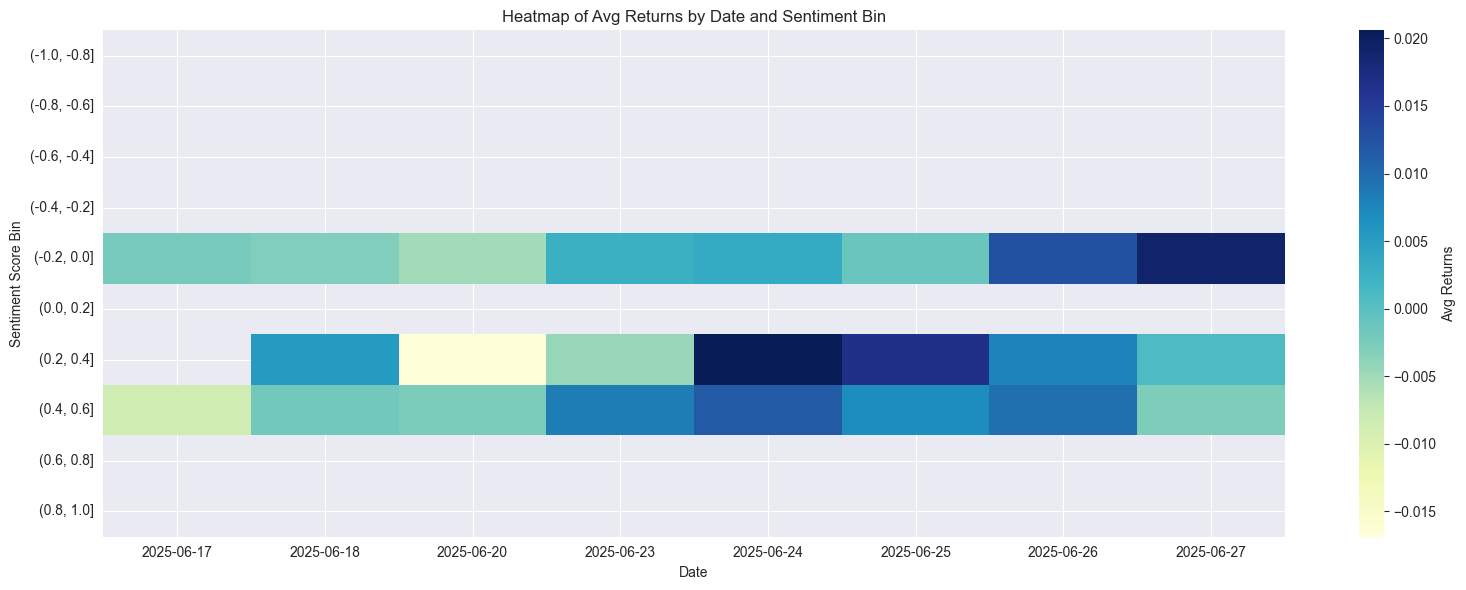

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df['sentiment_bin'] = pd.cut(df['reddit_sentiment_score'], bins=np.linspace(-1, 1, 11))

# Group and aggregate
heatmap_data = df.groupby(['date', 'sentiment_bin'])['returns'].mean().unstack(fill_value=0)

# Plot
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', cbar_kws={'label': 'Avg Returns'})
plt.xlabel('Date')
plt.ylabel('Sentiment Score Bin')
plt.title('Heatmap of Avg Returns by Date and Sentiment Bin')
plt.tight_layout()
plt.show()

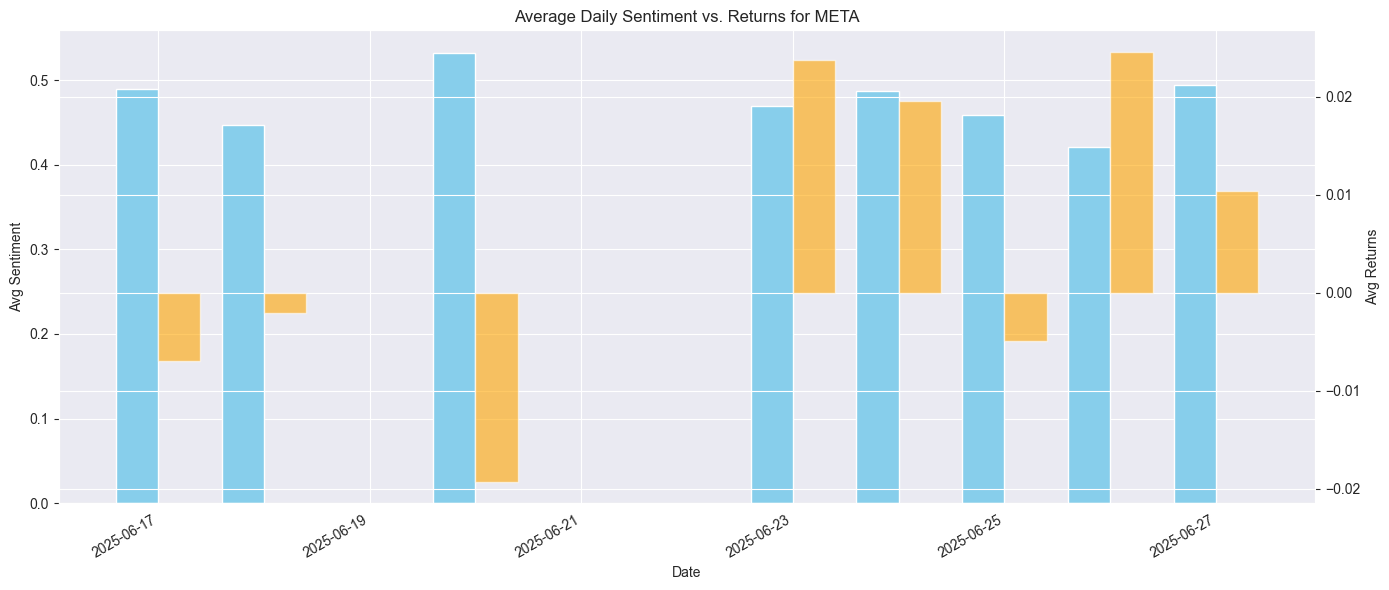

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by date and ticker
daily_stats = df.groupby(['date', 'ticker']).agg({
    'reddit_sentiment_score': 'mean',
    'returns': 'mean'
}).reset_index()

ticker = 'META'
ticker_stats = daily_stats[daily_stats['ticker'] == ticker]

fig, ax1 = plt.subplots(figsize=(14, 6))
x = pd.to_datetime(ticker_stats['date'])

width = 0.4
ax1.bar(x - pd.Timedelta(days=0.2), ticker_stats['reddit_sentiment_score'],
        width=width, color='skyblue', label='Avg Sentiment', align='center')
ax2 = ax1.twinx()
ax2.bar(x + pd.Timedelta(days=0.2), ticker_stats['returns'],
        width=width, color='orange', label='Avg Returns', align='center', alpha=0.6)
# # After plotting both bars
# min_y = min(ax1.get_ylim()[0], ax2.get_ylim()[0], 0)
# max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1], 0)
# ax1.set_ylim(min_y, max_y)
# ax2.set_ylim(min_y, max_y)
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Sentiment')
ax2.set_ylabel('Avg Returns')
plt.title(f'Average Daily Sentiment vs. Returns for {ticker}')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

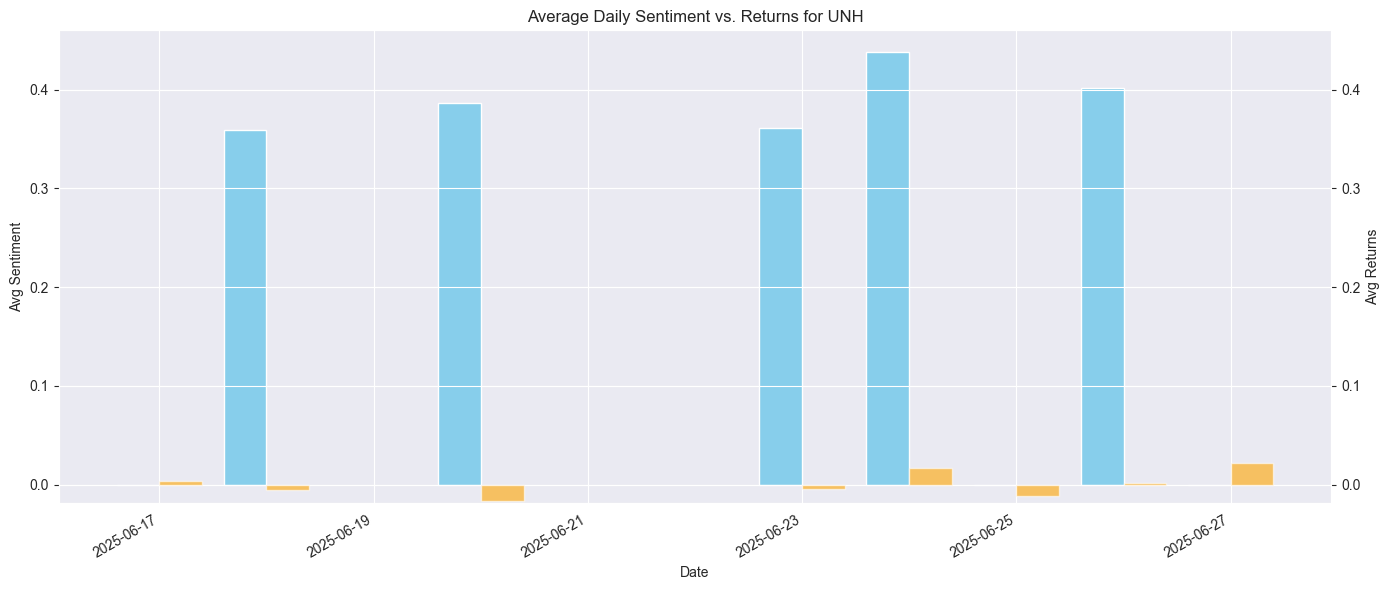

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by date and ticker
daily_stats = df.groupby(['date', 'ticker']).agg({
    'reddit_sentiment_score': 'mean',
    'returns': 'mean'
}).reset_index()

ticker = 'UNH'
ticker_stats = daily_stats[daily_stats['ticker'] == ticker]

fig, ax1 = plt.subplots(figsize=(14, 6))
x = pd.to_datetime(ticker_stats['date'])

width = 0.4
ax1.bar(x - pd.Timedelta(days=0.2), ticker_stats['reddit_sentiment_score'],
        width=width, color='skyblue', label='Avg Sentiment', align='center')
ax2 = ax1.twinx()
ax2.bar(x + pd.Timedelta(days=0.2), ticker_stats['returns'],
        width=width, color='orange', label='Avg Returns', align='center', alpha=0.6)
# After plotting both bars
min_y = min(ax1.get_ylim()[0], ax2.get_ylim()[0], 0)
max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1], 0)
ax1.set_ylim(min_y, max_y)
ax2.set_ylim(min_y, max_y)
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Sentiment')
ax2.set_ylabel('Avg Returns')
plt.title(f'Average Daily Sentiment vs. Returns for {ticker}')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

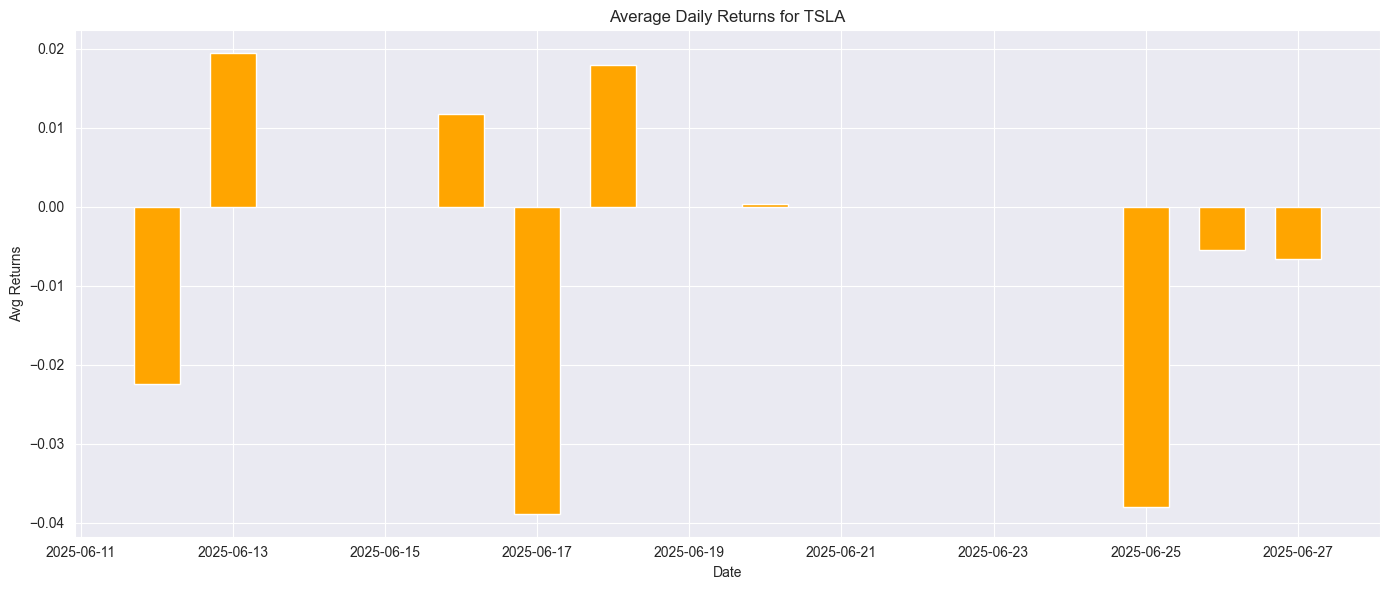

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by date and ticker, calculate mean returns
daily_returns = df.groupby(['date', 'ticker'])['returns'].mean().reset_index()

ticker = 'TSLA'
ticker_data = daily_returns[daily_returns['ticker'] == ticker]

plt.figure(figsize=(14, 6))
plt.bar(pd.to_datetime(ticker_data['date']), ticker_data['returns'], color='orange', width=0.6)
plt.xlabel('Date')
plt.ylabel('Avg Returns')
plt.title(f'Average Daily Returns for {ticker}')
plt.tight_layout()
plt.show()

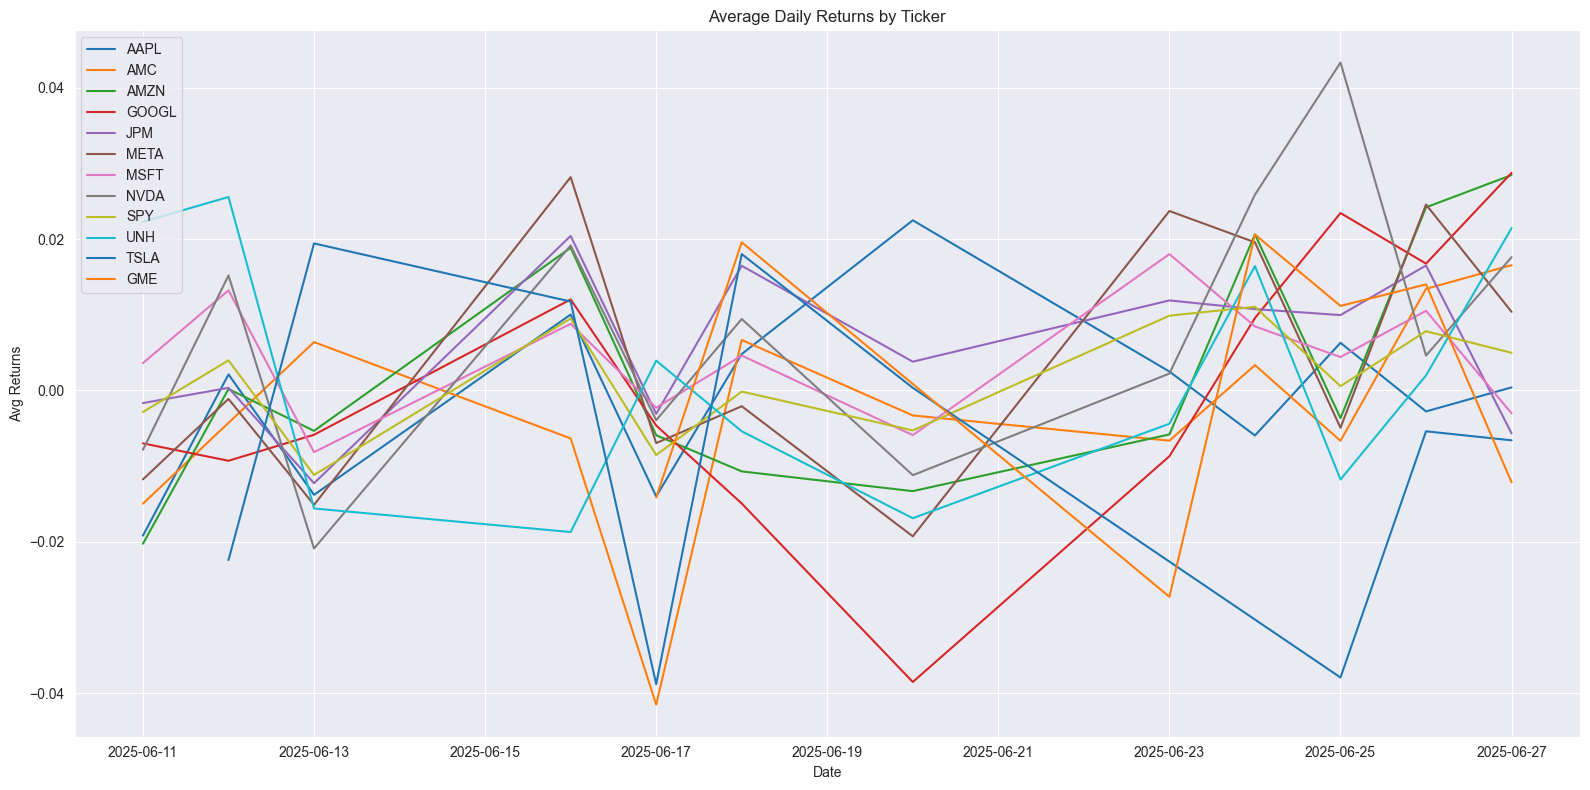

In [3]:
plt.figure(figsize=(16, 8))
for ticker in daily_returns['ticker'].unique():
    ticker_data = daily_returns[daily_returns['ticker'] == ticker]
    plt.plot(pd.to_datetime(ticker_data['date']), ticker_data['returns'], label=ticker)
plt.xlabel('Date')
plt.ylabel('Avg Returns')
plt.title('Average Daily Returns by Ticker')
plt.legend()
plt.tight_layout()
plt.show()